
# URDF Joints

This example shows how to load a URDF description of a robot, set some joint
angles and display relevant frames.


In [11]:
import matplotlib.pyplot as plt
from pytransform3d.urdf import UrdfTransformManager

## URDF
URDFs have to be provided as strings. These can be loaded from files.



In [12]:
COMPI_URDF = """
<?xml version="1.0"?>
  <robot name="compi">
    <link name="linkmount"/>
    <link name="link1"/>
    <link name="link2"/>
    <link name="link3"/>
    <link name="link4"/>
    <link name="link5"/>
    <link name="link6"/>
    <link name="tcp"/>

    <joint name="joint1" type="revolute">
      <origin xyz="0 0 0" rpy="0 0 0"/>
      <parent link="linkmount"/>
      <child link="link1"/>
      <axis xyz="0 0 1.0"/>
    </joint>

    <joint name="joint2" type="revolute">
      <origin xyz="0 0 0.158" rpy="1.570796 0 0"/>
      <parent link="link1"/>
      <child link="link2"/>
      <axis xyz="0 0 -1.0"/>
    </joint>

    <joint name="joint3" type="revolute">
      <origin xyz="0 0.28 0" rpy="0 0 0"/>
      <parent link="link2"/>
      <child link="link3"/>
      <axis xyz="0 0 -1.0"/>
    </joint>

    <joint name="joint4" type="revolute">
      <origin xyz="0 0 0" rpy="-1.570796 0 0"/>
      <parent link="link3"/>
      <child link="link4"/>
      <axis xyz="0 0 1.0"/>
    </joint>

    <joint name="joint5" type="revolute">
      <origin xyz="0 0 0.34" rpy="1.570796 0 0"/>
      <parent link="link4"/>
      <child link="link5"/>
      <axis xyz="0 0 -1.0"/>
    </joint>

    <joint name="joint6" type="revolute">
      <origin xyz="0 0.346 0" rpy="-1.570796 0 0"/>
      <parent link="link5"/>
      <child link="link6"/>
      <axis xyz="0 0 1.0"/>
    </joint>

    <joint name="jointtcp" type="fixed">
      <origin xyz="0 0 0.05" rpy="0 0 0"/>
      <parent link="link6"/>
      <child link="tcp"/>
    </joint>
  </robot>
"""

tm = UrdfTransformManager()
tm.load_urdf(COMPI_URDF)

print(tm)
# print(COMPI_URDF)

## Set Joints
In this example, we define joint angles manually. Joints are identified by
their string names extracted from the URDF.



In [13]:
joint_names = ["joint%d" % i for i in range(1, 7)]
joint_angles = [0, 0.5, 0.5, 0, 0.5, 0]
for name, angle in zip(joint_names, joint_angles):
    tm.set_joint(name, angle)  # 设置关节位置。

## Visualization
We use matplotlib to visualize the link frames of the URDF and connections
between these.



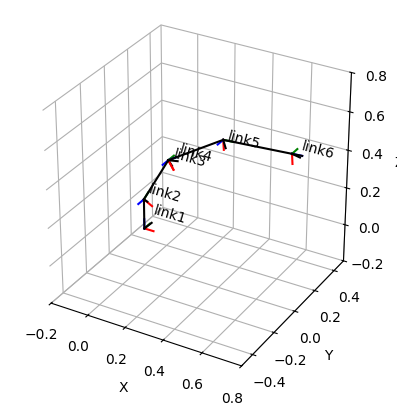

In [24]:
ax = tm.plot_frames_in("compi", whitelist=["link%d" % d for d in range(1, 7)],
                       s=0.05, show_name=True)
# ax = tm.plot_frames_in(whitelist=["link%d" % d for d in range(1, 7)],
#                        s=0.05, show_name=True)
# plot_frames_in(frame, ax=None, s=1.0, ax_s=1, show_name=True, whitelist=None, **kwargs)
# 绘制给定参照系中的所有坐标系 frame:参考坐标系，s:缩放比例，whitelist:必须绘制的坐标系
ax = tm.plot_connections_in("compi", ax=ax)  # 绘制给定参考坐标系中的直接坐标系连接图。
ax.set_xlim((-0.2, 0.8))
ax.set_ylim((-0.5, 0.5))
ax.set_zlim((-0.2, 0.8))
plt.show()